<div style="background-color:lightblue">
<h1><center>
    The Data Science Labs on <br/>
     Differential and Integral Calculus  <br/>
   <small>by Alden Bradford and Mireille Boutin </small>
</center></h1>
    </div>

<h1><center>
    Laboratory 4<br/>
   Floating Point Numbers<br/>
    <small>Last Updated Dec. 17 2021 </small>
</center></h1>

<h2 style="color:orange;"><left>00. Content </left></h2>

## Mathematics ##
- Approximating derivatives using finite difference schemes
- Approximation bias
    
## Programming Skills ##
- number types: int, float
- use of underscore
    
## Embedded Systems ##
- item

<h2 style="color:orange;"><left>0. Required Hardware </left></h2> 

- item

# Two types of number in Python

One of the benefits of using Python is that it has great support for numbers. This makes it much more friendly to doing math than, for example, Javascript or C. Whole numbers in Python have the type `int`, which is short for Integer. You can check this yourself:

In [1]:
type(5)

int

Python `int`s can be as big as you like, positive or negative. It can get a bit cumbersome writing and reading them, and the comma has a special meaning in Python, so you can't use it to separate big integers for legibility:

In [2]:
123,456,789

(123, 456, 789)

That gives us a list of three integers. If you want to refer to the number 123,456,789 you can write it without separations, but it is easier to read if you use the underscore symbol where there would be a comma:

In [3]:
123_456_789 == 123456789

True

You can put underscores wherever you like in a number -- python ignores them. You could represent a credit card number, for example:

In [4]:
3782_8224_6310_005

378282246310005

Unfortunately, it's not possible to represent every number exactly in a computer. For numbers which are not whole numbers, Python only keeps a certain number of digits. This way of storing numbers is called *floating point*, and numbers stored this way are called *flaoting point numbers*. In Python, the type for floating point numbers is `float`:

In [5]:
type(1.0)

float

Floating point numbers have some quirks you need to be aware of. For example, we know that 0.1+0.2=0.3, but look what Python tells us:

In [6]:
0.1+0.2

0.30000000000000004

It is slightly wrong. What is going on here? Floating point numbers are stored in binary, and in binary, 0.1 and 0.2 are infinite repeating decimals. In binary, we would write the number one tenth as 0.0001100110011... and so on forever. We don't have an infinite amount of memory available on our computers, so Python only stores 53 binary digits, which introduces roundoff error. The relative error is at most $2^{-53} = 1.11\times 10^{-16}$, so numbers are not reliable beyond sixteen places. Sure enough, in the example above, we got an error sixteen places after the 3.

In [7]:
2**-53

1.1102230246251565e-16

In a later lab we will introduce a tool you can use to do exact arithmetic with Python. But for most purposes, this relative error is no trouble at all.

## Exercise
For each of the following constants, look them up on Wikipedia and report the relative error in their known values. Compare that to the relative error in a floating point number. Make sure you are using relative error, not absolute error.

 - mass of an electron
 - duration of a year
 - distance from New York to Los Angeles
 - Freezing point of water (in Kelvin)

# Troubles with floating point numbers

Precision is usually not a problem with flaoting point numbers, with one major exception which we will address later. The main issue you will face is when comparing numbers. Check this out:

In [8]:
for x in range(1, 10):
    if x/10 == 0.1*x:
        print(x)

1
2
4
5
8
9


## exercise

Explain why a few numbers are missing from the printout above. Include the python values of `x/10` and `0.1*x` in your explanation, for some values of `x`.

There are two main ways to deal with this:

1. Whenever possible, use `>=` or `<=` instead of `==` when comparing floating point numbers. This is usually the best thing to do. For example, if a nubmer is ddecreasing and you want to know when it hits zero, check if it is positive instead of checking if it's zero. Or, better yet, check if it's less than 0.0001, keeping as much precision as you need for your purpose and no more.

2. Instead of checking if floats are equal, check if they are close to eachother. For example, the builtin function `math.isclose` can do this for you, or you can use the version in numpy if working with arrays. Here is how that might look:

In [9]:
import math
for x in range(1, 10):
    if math.isclose(x/10, 0.1*x):
        print(x)

1
2
3
4
5
6
7
8
9


In [10]:
import numpy as np
x = np.arange(1, 10)
print(np.isclose(x/10, 0.1*x))

[ True  True  True  True  True  True  True  True  True]


# catastrophic cancellation

There is one situation where roundoff error is a really big problem. That is when you are subtracting two numbers which are very close together. This isn't anything special about floating point numbers, this is just a fact about rounding. Here, have a look:

\begin{array}{r}
3.14159265358???\\
-\; 3.14159265332???\\\hline
0.00000000026???
\end{array}

Here I used question marks to represent unknown digits, i.e. digits which were lost due to rounding. That's pretty intuitive, and I think it shows how the relative error in the output is much bigger than in either of the inputs: each input has 12 significant figures, but the output has only two significant figures. We can do this a bit more precisely by writing the absolute errors explicitly:

\begin{align*}
3.14159265358??? &\rightarrow 3.14159265358 \pm 5\times 10^{-12}\\
3.14159265332??? &\rightarrow 3.14159265332 \pm 5\times 10^{-12}\\
0.00000000026??? &\rightarrow 0.00000000026 \pm \text{(you figure this one out)}\\
\end{align*}

## exercise
What is the absolute error in the output? What are the relative errors of each of the inputs, and what is the relative error of the output?

## a practical example of catastrophic cancellation

Here we walk you through coding an example where catestrophic cancellation makes a pretty big difference, and something clever you can do to fix it.

1. Write a function which takes the coefficients `a`, `b`, and `c` from a polynomial $ax^2+bx+c$ and gives you the roots. Just apply the standard quadratic formula. Have it give the "plus" root first. <TODO: include a auto-grading function for this.>

In [11]:
# students will give something like this
def naive_roots(a, b, c):
    t = math.sqrt(b**2-4*a*c)
    return (-b+t)/(2*a), (-b-t)/(2*a)

2. Factor the polynomial $x^2-1,000,000.000,001 x +1$ exactly, on paper (note the decimal place in `b`). What should the roots be?

3. Apply your simple root-finding function to this polynomial. What are the relative errors in your computed roots, compared to the true values? Explain why one of these has a larger relative error.

Here is a simple technique we can apply to reduce the error. Let's assume for now that `b` is a negative number. So, we get cancellation in the numerator when subtracting $-b$ and $\sqrt{b^2-4ac}$. In this case, just multiply by one in a clever way:

\begin{align*}
\frac{-b-\sqrt{b^2-4ac}}{2a}
&= \frac{-b-\sqrt{b^2-4ac}}{2a} \times \frac{-b+\sqrt{b^2-4ac}}{-b+\sqrt{b^2-4ac}}\\
&= \frac{b^2-(b^2-4ac)}{2a(-b+\sqrt{b^2-4ac})}\\
&= \frac{2c}{-b+\sqrt{b^2-4ac}}
\end{align*}

Since `b` is negative and `-b` is positive, there is no cancellation here! We can use this formula to compute the "-" root and the original formula to compute the "+" root.

4. Assuming `b` is always negative, rewrite your function using this formula. Compute the relative errors on the example above, using your new formula.

5. Figure out a similar formula which works when `b` is always positive. Use both formulas to write a function to compute the roots which is always accurate, and does not suffer from catestrophic cancellation.

6. Finish off your function by adding a special case for if either `a` or `c` is exactly zero.

This example shows how catestrophic cancellation can occur even in friendly, well-known functions. This also shows that we can usually deal with it, by doing some clever algebra. This is such a common issue that there are now tools available to identify and fix catestrophic cancellation. If you are curious, check out [Herbie](http://herbie.uwplse.org/), which a friend of mine helped to create.

# Numerical differentiation

Now you are prepared to see the major problem we are up against when trying to compute derivatives using floating-point arithmetic. Remember that by definition, the derivative of a function $f(x)$ is

$$
f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}
$$

This suggests a simple way to compute a derivative: pick a really small number $h$, and compute $\frac{f(x+h)-f(x)}{h}$. Since $h$ is just a small but finite number, this is called the *finite difference method*.

## exercise

Let's see what happens when we apply this procedure blindly. We will apply this formula for $f(x)=x^2$ at the point $x=4$. The correct derivative should be 8. What is the relative error in using the finite difference method, for various values of $h$? Choose geometrically distributed $h$ between $10^{-15}$ and $1$ (the function `numpy.geomspace` will be useful here). Compute the derivative using the procedure above, for each value of $h$. Produce a log-log plot; on the x-axis put h, and on the y axis put the absolute value of the relative error.

In light of what you have learned today about catastrophic cancellation, explain the shape of the curve you get. Explain why it is not a good idea to just make $h$ as small as possible.

In [12]:
import matplotlib.pyplot as plt

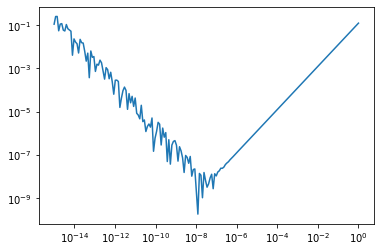

In [13]:

# students will do something like this
h = np.geomspace(1e-15, 1, 200)
derivative = ((4+h)**2-4**2)/h
true_deriv = 8
relative_error = (derivative-true_deriv) / true_deriv

plt.loglog(h, abs(relative_error))
plt.show()

# finite difference schemes

This shows the basic struggle of computing numerical derivatives: the definition of the derivative requires `h` to be infinitely small, but we can't precically make it that small. This isn't just because of catesprophic cancellation, by the way -- often when working with real data you are limited in how fast you can collect it. Hence, our goal will be to find ways to get more accurate estimates of the derivative without just making the step size $h$ tiny. We will consider $h$ to be fixed, and try to get our estimate as good as possible.

## bias in the forward difference

Let's examine the finite difference method, applied to the function $f(x) = x^3$ at $x=2$. For ease of illustration, let's choose $h=0.5$. Our estimate of $f'(2)$ is just

$$
f'(2)\approx \frac{(2+0.5)^3-2^3}{0.5}.
$$

is this an over-estimate or an under-estimate? Let's draw a picture to help us see.

## exercise

Find an equation for the tangent line to $y=f(x)$ at $x=2$. Find an equation for the secant line intersecting $y=f(x)$ at $x=2$ and $x=2.5$.

Now that we have formulas for those lines, we can plot those lines:

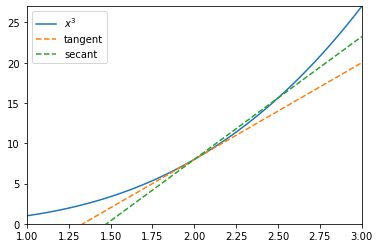

In [14]:
x = np.linspace(1,3)
cube = x**3
tangent = 12*(x-2)+8
secant = ((2.5**3-2**3)/0.5)*(x-2)+8
plt.plot(x, cube, label="$x^3$")
plt.plot(x, tangent, '--', label="tangent")
plt.plot(x, secant, '--', label="secant")
plt.ylim(0,27)
plt.xlim(1, 3)
plt.legend()
plt.show()

That shows it visually: the slope of the secant line is bigger than the slope of the tangent line. We can see it algebraically too:
\begin{align*}
\frac{(2+0.5)^3-2^3}{0.5}
&=\frac{12(0.5)+6(0.5)^2+(0.5)^3}{0.5}\\
&=12+6(0.5)+(0.5)^2
\end{align*}
The correct derivative is 12, and the other terms (most of all the term $6(0.5)$) are making it too big.

When we choose $h$ to be a positive number, we call that a *forward difference*. What if we try making $h$ negative, doing a so-called *backward difference*? Try that now.

## exercise

Create a similar plot to show what happens if $h=-0.5$. Is the slope of the secant line too big, or too small, in this case? Support your claim using your figure. How is this related to the curvature of the function $f(x)=x^3$?

## correcting the bias

As you have noticed, the forward difference gave us an over-estimate while the backward difference gave an under-estimate. This gives us a clear way to do better: we could average these answers out, which would give us a (hopefully) unbiased answer. Algebraically, this would look something like this:

\begin{align*}
\frac{1}{2}\left[ \frac{f(x+h) - f(x)}{h} + \frac{f(x-h)-f(x)}{-h} \right]
&= \frac{f(x+h)-f(x)-f(x-h) + f(x)}{2h}\\
&= \frac{f(x+h)-f(x-h)}{2h}
\end{align*}

This is the *symmetric difference* scheme. You can think of it as a secant line which doesn't go through a given point, but rather goes through its neighbors.

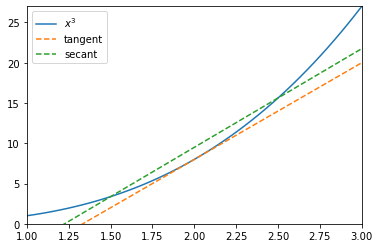

In [15]:
x = np.linspace(1,3)
cube = x**3
tangent = 12*(x-2)+8
secant = (2.5**3-1.5**3)*(x-1.5)+1.5**3
plt.plot(x, cube, label="$x^3$")
plt.plot(x, tangent, '--', label="tangent")
plt.plot(x, secant, '--', label="secant")
plt.ylim(0,27)
plt.xlim(1, 3)
plt.legend()
plt.show()

No obvious bias! We can still work out algebraically that it's not exact:
$$
\frac{(2+0.5)^3 - (2+0.5)^3}{2*(0.5)} = 2(0.5)^3
$$
this is still a slight overestimate. However, it's clearly way better for any given step size $h$. The error gets small really fast, too: if we instead had $h=10^{-6}$, the error would be just $2*(10^{-6})^3 = 2\times 10^{-18}$, which is below the floating-point error. Symmetric difference is better than forward difference!

## exercise

Work out the symetric difference exactly on paper for the function $f(x)=5x^2+3x-7$, for a variable step size $h$, at the point $x=2$. Find the relative error, and comment on it.

# Unequal step sizes

When we can control the step size, we are lucky: there are just two points to check in the symmetric difference scheme! The middle term cancelled out. With real data, we are not always so lucky: most of the time, data just comes in when it's available. We can get a formula that's just as good as the symmetric difference scheme, even if the step sizes are not equal. The trick is to ask for that cool property you just found, that the formula should be exact for quadtratic polynomials. That is: we are looking for numbers $d_-$, $d_0$, $d_+$ so that 

$$
f'(x) = d_{-} f(x-k) +d_0 f(x) + d_+ f(x+h)
$$

for any quadratic polynomial $f(x)=ax^2+bx+c$. Let's derive those values $d_-$, $d_0$, and $d_+$ now. For this purpose, we really only need a specific version of this equation:

$$
f'(0) = d_{-} f(-k) +d_0 f(0) + d_+ f(h) \tag{*}
$$



Since it should work for any quadratic polynomial, we can get picky. It should work for specifically the polynomial $f(x) = (x+k)(x-h)$. Putting this into our formula ($*$) above, we find

\begin{align*}
f'(0) = k-h &= d_0(-kh)\\
d_0&=\frac{1}{h} -\frac{1}{k}
\end{align*}

The difference scheme should also work for the polynomial $f(x)=x(x+k)$ at the point $x=0$. We can work it out the same way:

\begin{align*}
f'(0) = k &= d_+h(h+k)\\
d_+&=\frac{k}{h(h+k)}
\end{align*}

## Exercise

Choose a quadratic polynomial $f(x)$ which will give you the value of $d_-$. You should find that 
$$
d_- = \frac{-h}{k(k+h)}.
$$

## Exercise

By choosing $f(x)=1$ in ($*$) we find that $d_-+d_0+d_+=0$. Verify that this is the case.

Suppose we have three points in time $x_0$, $x_-$, and $x_+$ with $x_-<x_0<x_+$. Suppose further that we have measured $f(x_-)$, $f(x_0)$, and $f(x_+)$. This gives us a good way to approximate the derivative of $f$ at $x_0$. We compute
\begin{align*}
k &= x_0-x_-\\
h &= x_+-x_0\\
d_0 &= \frac{1}{h}-\frac{1}{k}\\
d_- &= \frac{-h}{k(k+h)}\\
d_+ &= \frac{k}{h(h+k)}\\
f'(x_0) &\approx d_- f(x_-) +d_0 f(x_0) + d_+ f(x_+)
\end{align*}

We could wrap that up as one big formula, which is less tidy but has a pleasant symmetry about it:
$$
f'(x_0) \approx \frac{-(x_+-x_0)}{(x_0-x_-)(x_+-x_-)} f(x_-) + \left(\frac{1}{x_+-x_0} -\frac{1}{x_0-x_-}\right)f(x_0) + \frac{x_0 -x_-}{(x_+-x_0)(x_+-x_-)} f(x_+)
$$

# Build a function

Now we know some good ways to compute derivatives of functions, so we should try them out. You have been given an ultrasonic distance sensor. This works by sending out a high-pitched chirp (higher than any person can hear) and listening for an echo. You can use that to do echolocation.

Try out the distance sensor using the following script, which will ask the RAspberry Pi Pico to collect data as fast as it can for 10 seconds, and report for each measurement the current time (in seconds) as well as the time between the chirp and the echo (in microseconds). The script plots the response in real time.

In [16]:
# <TODO: include the script.>

## exercise

to get used to the ultrasonic distance sensor, move a book or any other fklat, hard object in front of your distance sensor to reproduce each of the following plots.

We can build a function which computes the derivative using the symmetric finite difference method above. Notice that since the sensor has to wait for the echo in between measurements, the times are not evenly spaced. We will have to use the uneven-spacing formula. Here we have started the function for you.

In [17]:
def finite_difference(f, x):
    # we won't have the backward difference at the start,
    # or the forward difference at the end, so those should
    # have the value NaN to represent not being available.
    k = np.empty_like(x)
    k[0] = np.nan
    k[1:] = x[1:] - x[:-1]
    h = np.roll(k, -1)
    # now h and k have the correct values. Here is a way we make the
    # the f values, "fm" for f minus and "fp" for f plus.
    fm = np.roll(f, 1)
    fm[0] = np.nan
    fp = np.roll(fm, -2)
    # we still need to compute the d values, and return a result.
    
    # (students fill this in please)
    


Now we can include the derivative on the plot along with the measured values. Cool! Try it out:

In [18]:
# <TODO: include the script to accomplish this, calling the students' finite difference function.>

# Try it out!
## exercise

Now that we can compute a derivative, repeat the previous exercise but instead of following the curve with the distance plot, follow the curve with the velocity plot.